This notebooks is for the development of code to convert a polygon to a network.

It tests both the historical functionality and funtionality using libraries.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [2]:
polygonfile = r'resources/ijssel_N_polygon.shp'

In [3]:
import ratin

SRTM loading failed
GDAL not installed


# Testing old RATIN-code

In [4]:
SMOOTHDEGREE, cutpoints, densi, space, horiLines = 15.0, 20, 5.0, 5.0, 15  #dense grid

Trying to load: resources/ijssel_N_polygon.shp
Load successful.

Trying to save to: output/ijssel_N_polygon.ldb
Ignoring z values.
Save successful.



d:\projecten\ratin\rat-in\eo-river-svn\ratin\geometry\polygon.py:184: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  fig.hold(hold)
D:\software\Anaconda3\envs\py27\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


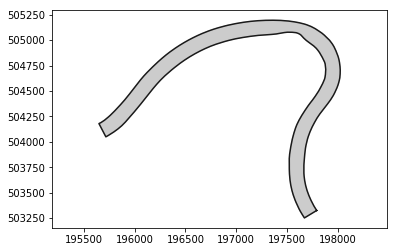

In [5]:
ldb = ratin.geometry.Polygon()
#Load Data
ldb.load(polygonfile)
ldb.save(ldb.data['data'].keys()[0], outputfile='output/ijssel_N_polygon')
#Representation
ldb.plot(fignum=1)
plt.show()

Polygon "polygon0" deemed as #0.

Polygon #0:
	Initial number of points: 466
	-> Densifying geometry...
	Densified number of points:  2066
-> Creating densified polygon... OK!
### Total number of points at start: 466
### Total number of points after densification: 2066

-> Defining Voronoi polygons...

Polygon #0:
	0 out of 6194 segments processed
	1000 out of 6194 segments processed
	2000 out of 6194 segments processed
	3000 out of 6194 segments processed
	4000 out of 6194 segments processed
	5000 out of 6194 segments processed
	6000 out of 6194 segments processed
	All segments processed.

-> Snapping significant points to skeleton...

-> Cleaning...
Polygon #0
Finished cleaning.

-> Constructing topology...
Topologies have been successfully created.

-> Calculating widths...
Branch # 1
Finished.



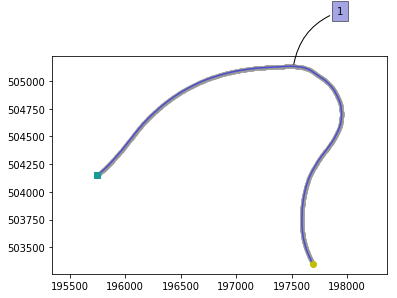

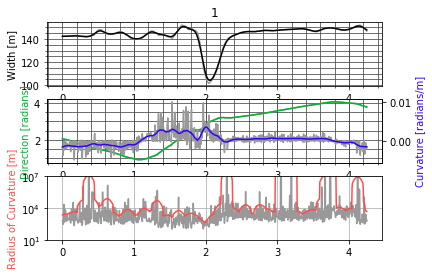

output written to output/network_overview.csv


In [7]:
STARTEND = [ [197727.048,503291.164], [195687.574,504118.171] ]
man = ratin.geometry.Network()
man.outputdir = 'output/'
man.load_geometries(ldb,STARTEND)
man.densify(densi) #densifies geometry; at least every X distance, there must be a point 
man.construct(spacing=[space])
man.delete(branch='1', num_of_pnts=cutpoints)
#Representation
man.plot(1)
#Network Stats:
man.overview(branch='1', fignum=2, smoothdegree=SMOOTHDEGREE, printoutput=True, units='radians')
#Save output of network file
man.save('output/man')


In [ ]:
>> python-geojson